<a href="https://colab.research.google.com/github/trantoan62/AI-CNN-TranQuocToan/blob/main/cifa100_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import MaxPooling2D
from keras.backend import conv2d
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.layers.core.flatten import Flatten
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
import plotly.graph_objects as go
from keras.preprocessing.image import load_img, img_to_array

In [34]:
from keras.datasets import cifar100

In [35]:
(X_train,Y_train),(X_test,Y_test) = cifar100.load_data()

In [36]:
labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus',
          'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab',
          'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 
          'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 
          'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 
          'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel',
          'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
          'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

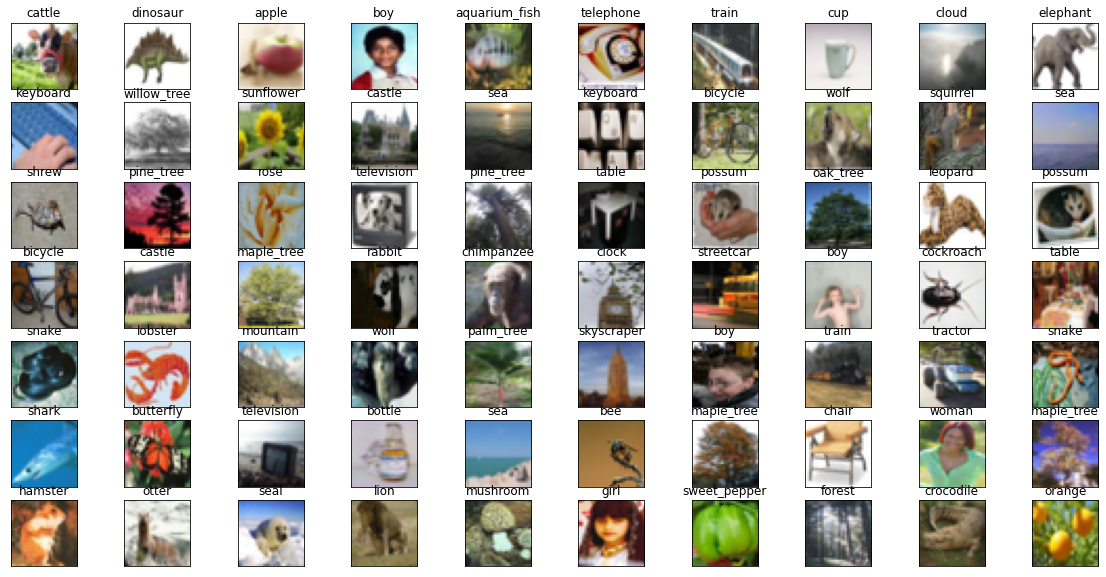

In [40]:
fig, axes = plt.subplots(ncols=10, nrows=7, figsize=(20, 10))
index = 0
for i in range(7):
    for j in range(10):
        axes[i,j].set_title(labels[Y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [41]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [42]:
X_train = X_train/255
X_test = X_test/255

In [43]:
Y_train = to_categorical (Y_train,100)
Y_test = to_categorical (Y_test,100)

In [44]:
X_train.shape

(50000, 32, 32, 3)

In [28]:
model = Sequential([
      Conv2D(16,(3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
      MaxPooling2D(),
      Conv2D(32,(3,3), padding='same', activation='relu'),
      MaxPooling2D(),
      Conv2D(64,(3,3), padding='same', activation='relu'),
      MaxPooling2D(),
      Conv2D(128,(3,3), padding='same', activation='relu'),
      MaxPooling2D(),
      Conv2D(128,(3,3), padding='same', activation='relu'),
      MaxPooling2D(),
      Flatten(),
      Dense(512, activation='relu'),
      Dense(100, activation='softmax')
  ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)        

In [29]:
model.compile(loss = ['categorical_crossentropy'], 
              optimizer = 'Adam', 
              metrics = ['accuracy'])

In [31]:
history=model.fit(X_train,Y_train,epochs=20,batch_size=64,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/20
782/782 [==============================] - 103s 132ms/step - loss: 3.9299 - accuracy: 0.0853 - val_loss: 3.5821 - val_accuracy: 0.1438
Epoch 2/20
782/782 [==============================] - 96s 123ms/step - loss: 3.3088 - accuracy: 0.1919 - val_loss: 3.1946 - val_accuracy: 0.2223
Epoch 3/20
782/782 [==============================] - 100s 128ms/step - loss: 2.9452 - accuracy: 0.2592 - val_loss: 2.8638 - val_accuracy: 0.2778
Epoch 4/20
782/782 [==============================] - 102s 131ms/step - loss: 2.6930 - accuracy: 0.3077 - val_loss: 2.7715 - val_accuracy: 0.3036
Epoch 5/20
782/782 [==============================] - 102s 130ms/step - loss: 2.4907 - accuracy: 0.3515 - val_loss: 2.6473 - val_accuracy: 0.3278
Epoch 6/20
782/782 [==============================] - 104s 133ms/step - loss: 2.3293 - accuracy: 0.3856 - val_loss: 2.6059 - val_accuracy: 0.3369
Epoch 7/20
782/782 [==============================] - 101s 129ms/step - loss: 2.1808 - accuracy: 0.4153 - val_loss: 2.5108 - 

In [45]:
model.save('cifa100_cnn.h5')

Predict  sunflower
Result  sunflower


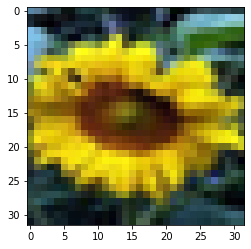

In [55]:
i = 76
y_pred = model.predict(X_test[[i]])
plt.imshow(X_test[i])
print('Predict ', labels[np.argmax(y_pred)])
print('Result ', labels[np.argmax(Y_test[i])])

Predict  rocket
Result  rocket


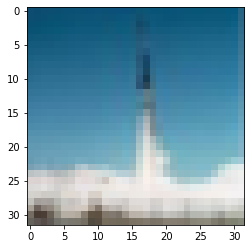

In [56]:
i = 13
y_pred = model.predict(X_test[[i]])
plt.imshow(X_test[i])
print('Predict ', labels[np.argmax(y_pred)])
print('Result ', labels[np.argmax(Y_test[i])])

Predict  worm
Result  crab


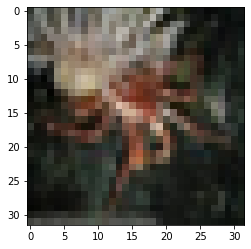

In [57]:
i = 100
y_pred = model.predict(X_test[[i]])
plt.imshow(X_test[i])
print('Predict ', labels[np.argmax(y_pred)])
print('Result ', labels[np.argmax(Y_test[i])])

Predict  bicycle
Result  bicycle


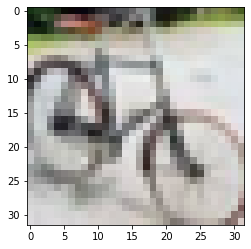

In [58]:
i = 27
y_pred = model.predict(X_test[[i]])
plt.imshow(X_test[i])
print('Predict ', labels[np.argmax(y_pred)])
print('Result ', labels[np.argmax(Y_test[i])])